# Predicting IMDb Rating of Movies Using Derived Features

I scraped 2332 movies from IMDb. All the movies had over 50,000 IMDb votes to ensure the integrity of the rating. This way, movies with a high score but a relatively small amount of votes would not be counted. The features I scraped for each movie were title, IMDb score, release year, MPAA certification (G, PG, etc.), genres, directors, runtime, domestic gross, and main stars. In addition, I plan on deriving several unique secondary features such as whether or not the movie title starts with "The," the number of directors that worked on the movie, and the number of genres the movie was classified under. Adding these engineered features could improve the model beyond just using the features scraped from the websites.


In [486]:
# The Dataset used for this project

,Score,Title,Release Year,Domestic Gross (million USD),MPAA Certification,Runtime,Number of Votes,Genres,Directors,Stars,...,Colon,The,Title Length,Number of Directors,Christopher Nolan,Adam Sandler,Akira Kurosawa,Quentin Tarantino,Alfred Hitchcock,Animation
0,6.7,Suicide Squad,2016,320.85,PG-13,123,219255,"Action, Adventure, Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",...,0,0,2,1,0,0,0,0,0,0
1,8.0,Captain America: Civil War,2016,408.08,PG-13,147,323106,"Action, Adventure, Sci-Fi","Anthony Russo, Joe Russo","Chris Evans, Robert Downey Jr., Scarlett Johan...",...,1,0,4,2,0,0,0,0,0,0
2,7.2,X-Men: Apocalypse,2016,155.33,PG-13,144,189465,"Action, Adventure, Sci-Fi",Bryan Singer,"James McAvoy, Michael Fassbender, Jennifer Law...",...,1,0,2,1,0,0,0,0,0,0
3,8.1,Zootopia,2016,341.26,PG,108,201262,"Animation, Adventure, Comedy","Byron Howard, Rich Moore, Jared Bush","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",...,0,0,1,3,0,0,0,0,0,1
4,7.6,The Jungle Book,2016,364.00,PG,106,141465,"Adventure, Drama, Family",Jon Favreau,"Neel Sethi, Bill Murray, Ben Kingsley, Idris Elba",...,0,1,3,1,0,0,0,0,0,0
5,5.4,Ghostbusters,2016,127.45,PG-13,116,91482,"Action, Comedy, Fantasy",Paul Feig,"Melissa McCarthy, Kristen Wiig, Kate McKinnon,...",...,0,0,1,1,0,0,0,0,0,0
6,6.7,The Secret Life of Pets,2016,364.33,PG,87,52894,"Animation, Adventure, Comedy","Yarrow Cheney, Chris Renaud","Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",...,0,1,5,2,0,0,0,0,0,1
7,8.1,The Revenant,2015,183.64,R,156,428618,"Adventure, Drama, Thriller",Alejandro G. Iñárritu,"Leonardo DiCaprio, Tom Hardy, Will Poulter, Do...",...,0,1,2,1,0,0,0,0,0,0
8,7.1,Warcraft,2016,47.17,PG-13,123,140547,"Action, Adventure, Fantasy",Duncan Jones,"Travis Fimmel, Paula Patton, Ben Foster, Domin...",...,0,0,1,1,0,0,0,0,0,0
9,6.4,The Legend of Tarzan,2016,126.59,PG-13,110,66031,"Action, Adventure, Drama",David Yates,"Alexander Skarsgård, Rory J. Saper, Christian ...",...,0,1,4,1,0,0,0,0,0,0


I tested out a simple linear model with a handful of features and it resulted in an adjusted R-squared value of 0.236, meaning there is still plenty of room for improvement.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     121.2
Date:                Tue, 04 Oct 2016   Prob (F-statistic):          1.54e-133
Time:                        16:54:24   Log-Likelihood:                -2709.6
No. Observations:                2332   AIC:                             5433.
Df Residuals:                    2325   BIC:                             5473.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------
const                           33.6822      3.086     10.914      0.000        27.630    39.734
Release Year                    -0.0140      0.002     -9.053      0.000        -0.017    -0.011
Domestic Gross (million USD)     0.0010      0.000      4.459      0.000         0.001     0.001
Runtime                          0.0145      0.001     17.646      0.000         0.013     0.016
PG                              -0.4699      0.088     -5.352      0.000        -0.642    -0.298
PG-13                           -0.7155      0.084     -8.542      0.000        -0.880    -0.551
R                               -0.2672      0.082     -3.266      0.001        -0.428    -0.107
==============================================================================
Omnibus:                      261.792   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              506.352
Skew:                          -0.719   Prob(JB):                    1.11e-110
Kurtosis:                       4.773   Cond. No.                     3.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

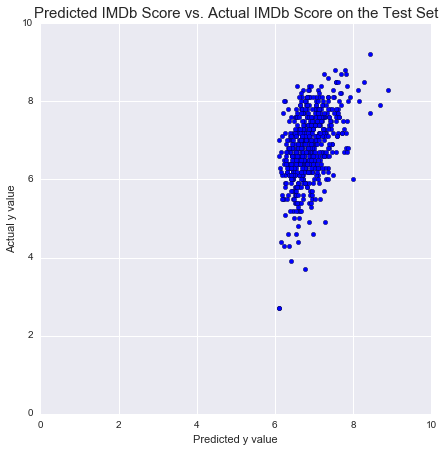

In [550]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.21123588548988115

After splitting the dataset into a 75-25 train-test split, the model performs only slightly worse on the test set, which means it is not suffering from overfitting. 